In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

In [43]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon3 = [(1,1),(10,3),(8,5),(10,6),(8,8),(10,9),(2,12),(4,10),(2,8),(4,7),(0,4),(3,2)]
polygon4 = [(0,0),(4,4),(6,1),(7,3),(8,1),(9,3),(11,1),(13,3),(7,9),(5,7),(3,10),(0,6)]
polygon5 = [(0,0),(12,1),(8,3),(12,4),(9,5),(12,6),(9,8),(12,9),(0,10),(8.8,6),(1,2)]
polygon6 = [(1,0),(3,2),(5,0),(6,2),(7,1),(9,9),(13,1),(15,3),(13,8),(10,10),(3,10),(6,6),(7,8),(7,4),(2,3),(1,7),(0,2)]
polygon7 = [(1,0),(3,3),(5,1),(7,3),(9,1),(11,2),(13,0),(15,2),(10,5),(14,6),(17,5),(16,3),(18,2),(18,7),(15,10),(7,10),(9,9),(6,7),(4,8),(6,10),(3,10),(0,8),(4,4.3),(6,4),(6,3.1),(1,5),(0,2)]
polygon8 = [(0.04277192608002693, 0.0008762265186683937),
(-0.0033571061780375833, 0.031544118675531155),
(-0.04238936424255372, 0.043339461812786056),
(-0.01777242875868275, 0.015367648087295849),
(-0.03551436424255372, 0.010312501028472323),
(-0.018437751339327915, -0.005863969559762983),
(-0.0341837190812634, -0.012604165638194359),
(-0.016885331984489202, -0.025747547991135537),
(-0.04150226746836017, -0.033498773481331616),
(-0.015554686823198882, -0.04023896955976299),
(-0.036401461016747266, -0.04799019504995907),
(-0.013115170694166622, -0.0530453421087826)]
polygon9 = [(1,0),(10,1),(3,2),(9,3),(3.5,4),(8,5),(4,6),(7,7),(4.5,8),(6,9),(0,10)]
polygon10 = [(4,4),(6,0),(8,4),(12,6),(8,8),(6,12),(4,8),(0,6)]
polygon11 = [(0,0),(20,2),(8,6),(20,7),(12,11),(19,12),(0,13),(10,12),(0,10),(12,9),(0,8),(9,7),(0,6),(13,4),(1,2)]
polygon12 = [(0,0),(10,2),(13,0),(15,2),(12,6),(14,8),(11,10),(7,11),(8,9),(10,8),(11,7),(9,5),(6,6),(5,7),(5.5,8),(6,10),(3,11),(1,11),(1,8),(3,6),(4,4),(2,3),(1,4),(0,3)]
polygon13 = [(0,1),(10,0),(18,1),(20,3),(20,10),(17,13),(14,15),(8,15),(6,14),(5,13),(6,11),(7,8),(5,5),(11,4),(14,7),(15,7.1),(12,8),(12,7),(9,8),(8,12),(13,13),(16,10),(15,8),(16,4),(3,3)]
polygon14 = [(10,0),(8,14),(7.5,11),(7,10),(6,9),(4,8),(1,7)]
       

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


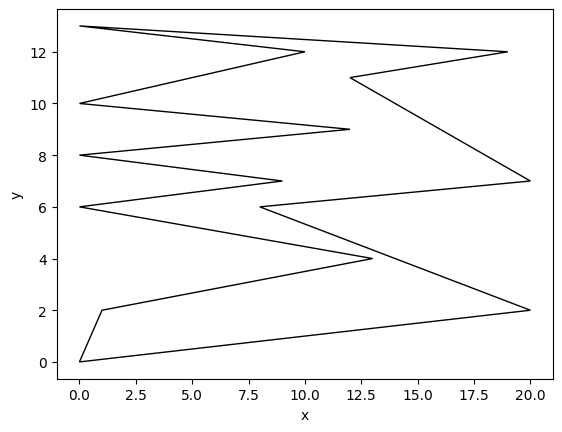

In [26]:

draw_polygon(polygon11)

In [5]:
def mat_det_3x3(a, b, c):
    return (a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[1]*b[0]-a[0]*c[1])

In [6]:
def classify(a, b, c, starting, closing, connective, separative, correct, epsilon = 10 ** (-12)):
    if a[1] < b[1] and c[1] < b[1]:
        if mat_det_3x3(a, b, c) > epsilon:
            starting.append(b)
        elif mat_det_3x3(a, b, c) < -epsilon:
            separative.append(b)
    elif a[1] > b[1] and c[1] > b[1]:
        if mat_det_3x3(a, b, c) > epsilon:
            closing.append(b)
        elif mat_det_3x3(a, b, c) < -epsilon:
            connective.append(b)
    else:
        correct.append(b)

In [7]:
def convert_to_lines(points):
    lines = []
    for p in range(len(points)-1):
        lines.append((points[p], points[p+1]))
    lines.append((points[-1], points[0]))
    return lines

In [8]:
def connective_or_separative(a, b, c, epsilon = 10 ** (-12)):
    det = mat_det_3x3(a, b, c)
    if a[1] > b[1] and c[1] > b[1] and det < -epsilon:
        return True
    elif a[1] < b[1] and c[1] < b[1] and det < -epsilon:
        return True
    return False

In [9]:
def is_y_monotonic(points):
    for i in range(0, len(points)-1):
        if connective_or_separative(points[i-1], points[i], points[i+1]):
            return False
    
    if connective_or_separative(points[-2], points[-1], points[0]):
        return False
    return True

In [10]:
def classify_points(points):
    starting = []
    closing = []
    connective = []
    separative = []
    correct = []
    
    for i in range(0, len(points)-1):
        classify(points[i-1], points[i], points[i+1], starting, closing, connective, separative, correct)
    
    classify(points[-2], points[-1], points[0], starting, closing, connective, separative, correct)
    
    return starting, closing, connective, separative, correct

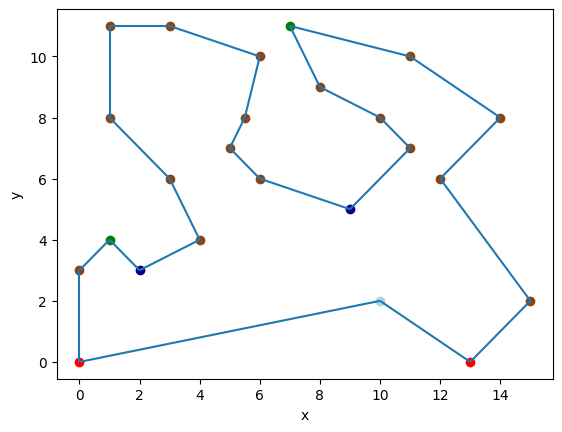

In [11]:
def draw_classification(points, starting, closing, connective, separative, correct):
    vis=Visualizer()
    vis.clear()
    vis.add_point(starting, color = "green")
    vis.add_point(closing, color = "red")
    vis.add_point(connective, color = "darkblue")
    vis.add_point(separative, color = "lightblue")
    vis.add_point(correct, color = "saddlebrown")
    
    vis.add_line_segment(convert_to_lines(points))
    vis.show()

starting, closing, connective, separative, correct = classify_points(polygon12)
draw_classification(polygon12, starting, closing, connective, separative, correct)

In [30]:
def find_chains(points):
    right_chain = []
    left_chain = []
    starting = points.index(max(points, key=lambda x: x[1]))
    ending = points.index(min(points, key=lambda x: x[1]))
    i = ending
    while i != starting:
        right_chain.append(points[i])
        i = (i + 1) % len(points)
    while i != ending:
        left_chain.append(points[i])
        i = (i + 1) % len(points)
    return left_chain, right_chain


def check_same_chains(left_chain, right_chain, point1, point2):
    if (point1 in left_chain and point2 in left_chain) or (point1 in right_chain and point2 in right_chain):
        return True
    return False

def triangle_in_polygon(chain, a, b, c, epsilon = 10 ** (-12)):
    if b in chain:
        return mat_det_3x3(a, b, c) > epsilon
    else:
        return mat_det_3x3(a, b, c) < -epsilon


def check_neighbours(points, a, b):
    a_index = points.index(a)
    b_index = points.index(b)
    if abs(a_index - b_index) == 1:
        return True
    elif abs(a_index - b_index) == len(points) - 1:
        return True
    return False

In [13]:
def triangulation_lines(points):
    if not is_y_monotonic(points):
        print("Polygon is not y-monotonic.")
        return None, None
    print("Polygon is y-monotonic.")

    points_copy = points[:]
    left_chain, right_chain = find_chains(points)
    points.sort(key=lambda x: x[1], reverse=True)

    stack = [points[0], points[1]]
    diagonals = []
    for i in range(2, len(points)):
        if not check_same_chains(left_chain, right_chain, stack[-1], points[i]):
            while len(stack) > 0:
                p = stack.pop()
                if not check_neighbours(points_copy, p, points[i]):
                    diagonals.append((points[i], p))
              
            stack.append(points[i - 1])
            stack.append(points[i])
        else:
            p = stack.pop()
            while len(stack) > 0 and triangle_in_polygon(left_chain, stack[-1], p, points[i]):
                if not check_neighbours(points_copy, p, points[i]) and (points[i], p) not in diagonals:
                    diagonals.append((points[i], p))
                if not check_neighbours(points_copy, stack[-1], points[i]) and (points[i], stack[-1]) not in diagonals:
                    diagonals.append((points[i], stack[-1]))
                p = stack.pop()
                
            stack.append(p)
            stack.append(points[i])
                 
    return diagonals


Polygon is y-monotonic.


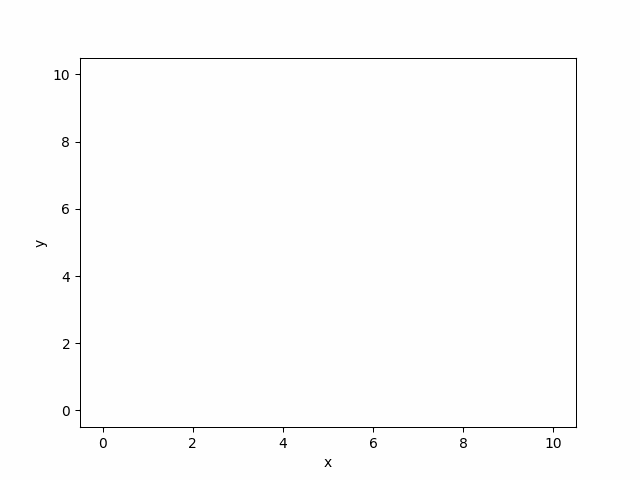

In [22]:
def triangulation(points):
    if not is_y_monotonic(points):
        print("Polygon is not y-monotonic.")
        return None, None
    print("Polygon is y-monotonic.")
    lines = convert_to_lines(points)
    vis.add_point(points, color='green')
    vis.add_line_segment(lines, color='black')
 

    points_copy = points[:]
    left_chain, right_chain = find_chains(points)
    points.sort(key=lambda x: x[1], reverse=True)

    stack = [points[0], points[1]]
    diagonals = []
    for i in range(2, len(points)):
        curr_diagonals = diagonals[:]
        curr_stack = stack[:]
        vis.add_point(points, color="green")
        vis.add_point(curr_stack, color="red")
        vis.add_point([points[i]], color="yellow")
        vis.add_line_segment(lines, color="black")
        vis.add_line_segment(curr_diagonals, color="blue")
      
        if not check_same_chains(left_chain, right_chain, stack[-1], points[i]):
            while len(stack) > 0:
                p = stack.pop()
                if not check_neighbours(points_copy, p, points[i]):
                    diagonals.append((points[i], p))
                curr_diagonals = diagonals[:]
                curr_stack = stack[:]
                vis.add_point(points, color="green")
                vis.add_point(curr_stack, color="red")
                vis.add_point([points[i]], color="yellow")
                vis.add_point([p], color="purple")
                vis.add_line_segment(lines, color="black")
                vis.add_line_segment(curr_diagonals, color="blue")
          
            stack.append(points[i - 1])
            stack.append(points[i])
        else:
            p = stack.pop()
            while len(stack) > 0 and triangle_in_polygon(left_chain, stack[-1], p, points[i]):
                if not check_neighbours(points_copy, p, points[i]) and (points[i], p) not in diagonals:
                    diagonals.append((points[i], p))
                if not check_neighbours(points_copy, stack[-1], points[i]) and (points[i], stack[-1]) not in diagonals:
                    diagonals.append((points[i], stack[-1]))
                p = stack.pop()
                curr_diagonals = diagonals[:]
                curr_stack = stack[:]
                vis.add_point(points, color="green")
                vis.add_point(curr_stack, color="red")
                vis.add_point([points[i]], color="yellow")
                vis.add_point([p], color="purple")
                vis.add_line_segment(lines, color="black")
                vis.add_line_segment(curr_diagonals, color="blue")

            stack.append(p)
            stack.append(points[i])
    curr_diagonals = diagonals[:]
    vis.add_point(points, color="green")
    vis.add_line_segment(lines, color="black")
    vis.add_line_segment(curr_diagonals, color="blue")
                                      
    return diagonals
vis=Visualizer()
vis.clear
lines=triangulation(polygon9)

vis.show_gif(interval=200)

Polygon is y-monotonic.


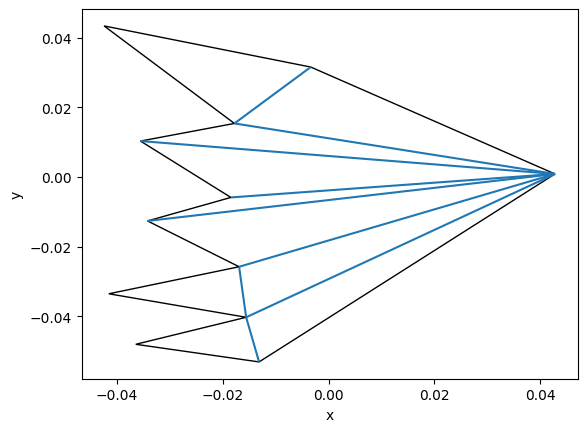

In [34]:
vis=Visualizer()
vis.clear()
vis.add_polygon(polygon8, fill=False)
diagonals=triangulation_lines(polygon8)
for diag in diagonals:
    vis.add_line_segment(diag)

vis.show()

Polygon is y-monotonic.


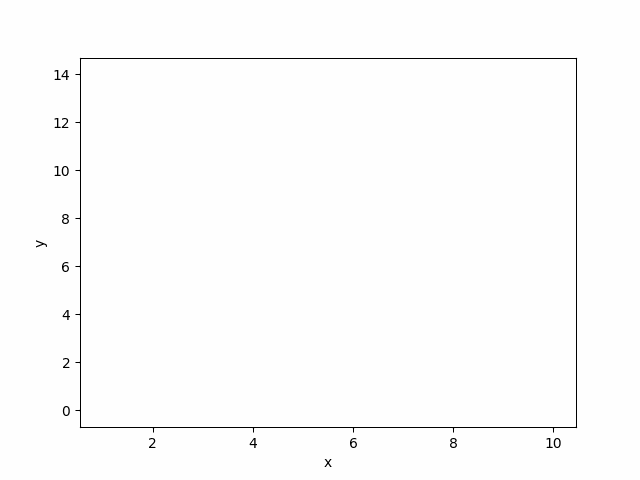

In [23]:
def triangulation(points):
    if not is_y_monotonic(points):
        print("Polygon is not y-monotonic.")
        return None, None
    print("Polygon is y-monotonic.")
    lines = convert_to_lines(points)
    vis.add_point(points, color='green')
    vis.add_line_segment(lines, color='black')
 

    points_copy = points[:]
    left_chain, right_chain = find_chains(points)
    points.sort(key=lambda x: x[1], reverse=True)

    stack = [points[0], points[1]]
    diagonals = []
    for i in range(2, len(points)):
        curr_diagonals = diagonals[:]
        curr_stack = stack[:]
        vis.add_point(points, color="green")
        vis.add_point(curr_stack, color="red")
        vis.add_point([points[i]], color="yellow")
        vis.add_line_segment(lines, color="black")
        vis.add_line_segment(curr_diagonals, color="blue")
      
        if not check_same_chains(left_chain, right_chain, stack[-1], points[i]):
            while len(stack) > 0:
                p = stack.pop()
                if not check_neighbours(points_copy, p, points[i]):
                    diagonals.append((points[i], p))
                curr_diagonals = diagonals[:]
                curr_stack = stack[:]
                vis.add_point(points, color="green")
                vis.add_point(curr_stack, color="red")
                vis.add_point([points[i]], color="yellow")
                vis.add_point([p], color="purple")
                vis.add_line_segment(lines, color="black")
                vis.add_line_segment(curr_diagonals, color="blue")
          
            stack.append(points[i - 1])
            stack.append(points[i])
        else:
            p = stack.pop()
            while len(stack) > 0 and triangle_in_polygon(left_chain, stack[-1], p, points[i]):
                if not check_neighbours(points_copy, p, points[i]) and (points[i], p) not in diagonals:
                    diagonals.append((points[i], p))
                if not check_neighbours(points_copy, stack[-1], points[i]) and (points[i], stack[-1]) not in diagonals:
                    diagonals.append((points[i], stack[-1]))
                p = stack.pop()
                curr_diagonals = diagonals[:]
                curr_stack = stack[:]
                vis.add_point(points, color="green")
                vis.add_point(curr_stack, color="red")
                vis.add_point([points[i]], color="yellow")
                vis.add_point([p], color="purple")
                vis.add_line_segment(lines, color="black")
                vis.add_line_segment(curr_diagonals, color="blue")

            stack.append(p)
            stack.append(points[i])
    curr_diagonals = diagonals[:]
    vis.add_point(points, color="green")
    vis.add_line_segment(lines, color="black")
    vis.add_line_segment(curr_diagonals, color="blue")
                                      
    return diagonals
vis=Visualizer()
vis.clear
lines=triangulation(polygon14)

vis.show_gif(interval=200)

In [44]:
#tworzenie triangulacji jako lista krawędzi i przekątnych
triangulation_all_edges = triangulation_lines(polygon11)
edges = convert_to_lines(polygon11)
for edge in edges:
    triangulation_all_edges.append(edge)
print(triangulation_all_edges)

Polygon is y-monotonic.
[((10, 12), (19, 12)), ((12, 11), (10, 12)), ((0, 10), (12, 11)), ((12, 9), (12, 11)), ((20, 7), (0, 8)), ((20, 7), (12, 9)), ((9, 7), (20, 7)), ((8, 6), (9, 7)), ((0, 6), (8, 6)), ((13, 4), (8, 6)), ((20, 2), (13, 4)), ((1, 2), (20, 2)), ((0, 13), (19, 12)), ((19, 12), (10, 12)), ((10, 12), (12, 11)), ((12, 11), (0, 10)), ((0, 10), (12, 9)), ((12, 9), (0, 8)), ((0, 8), (20, 7)), ((20, 7), (9, 7)), ((9, 7), (8, 6)), ((8, 6), (0, 6)), ((0, 6), (13, 4)), ((13, 4), (20, 2)), ((20, 2), (1, 2)), ((1, 2), (0, 0)), ((0, 0), (0, 13))]
